# Relativistic shallow water Riemann problem

The code can be used to solve the Riemann problem for the relativistic shallow water equations,
$$
  \partial_t \begin{pmatrix} \Phi W \\ \Phi W^2 u_j \end{pmatrix} + \partial_x \begin{pmatrix} \Phi W u^i \\ \Phi W^2 u_j u^i + \tfrac{1}{2} \Phi^2 \delta^i_j \end{pmatrix} = {\bf 0}.
$$

This can also be written
$$
  \partial_t \begin{pmatrix} D \\ S_j \end{pmatrix} + \partial_x \begin{pmatrix} D u^i \\ S_j u^i + \frac{D^2}{2 W^2} \delta^i_j \end{pmatrix} = {\bf 0}.
$$

Remember that the Lorentz factor $W^{-2} = 1 - u_j u^j$.

In these equations, we have defined $\Phi$ to be the geopotential, which is equal to $\Phi = gh$ in the Newtonian limit (where $g$ is the graviational acceleration and $h$ is the fluid height).

As in the Riemann problem for the reative relativistic Euler equations, the initial data is piecewise constant. It consists of two states $w_L$ and $w_R$, where $w = (\Phi, v)$. At $t = 0$, the $w_L$ gives the data for $x < 0$, and $w_R$ the data for $x > 0$. Unlike for the Euler equations, we do not require an equation of state. 

## Code

To set up the Riemann problem, we first initialise the SWE factory and define the left and right states.

In [1]:
from r3d2 import SWEFactory

In [2]:
f = SWEFactory()

Ul = f.state(0.41, 0)
Ur = f.state(0.01, 0)

rp = f.riemann_problem(Ul, Ur, t_end=0.3)

The Riemann problem will produce output directly in the notebook:

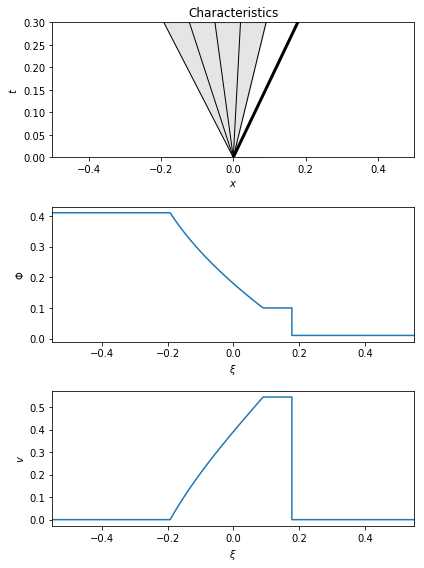

In [3]:
rp

This output should be interpreted as follows. First it displays the initial states ${\bf U}_{L, R}$. It then gives the resulting wave pattern: in this case a left going rarefaction, a contact, and a right going shock. It then gives the geopotential $\Phi_*$ in the central states (the geopotential and velocity do not jump across the contact). Next it gives the speeds of each wave. Finally, it gives the constant states between the left wave and the contact ${\bf U}_{*_L}$ and between the contact and the right state ${\bf U}_{*_R}$.

We can also display the output graphically in the notebook:

In [4]:
from IPython.display import display_png

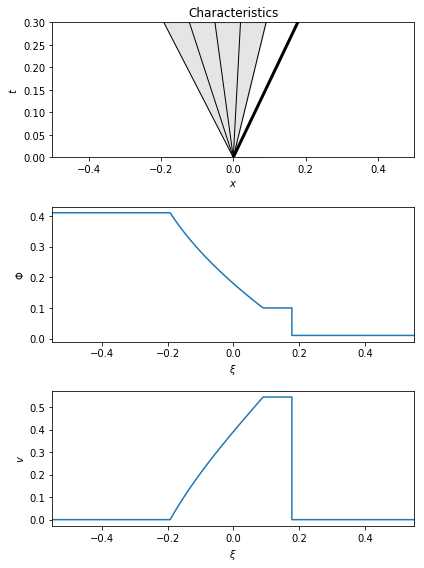

In [5]:
display_png(rp)

The top plot shows the wave pattern in the $(x,t)$ plane. Rarefactions are shaded with thin solid lines. Contacts are dashed lines. Discontinuities such as shocks are thick solid lines. 

The other two plots show the geopotential and velocity as a function of space at the time given by the `t_end` parameter (which is either defined by the user when creating the Riemann problem or defaults to 1), or equivalently as a function of the characteristic variable $\xi = x/t$.

## Extreme example

In this example, the initial data is more extreme, leading to a very relativistic velocity in the star state.

In [9]:
Ul = f.state(0.9999, 0)
Ur = f.state(0.00001, 0)

rp_extreme = f.riemann_problem(Ul, Ur, t_end=0.3)

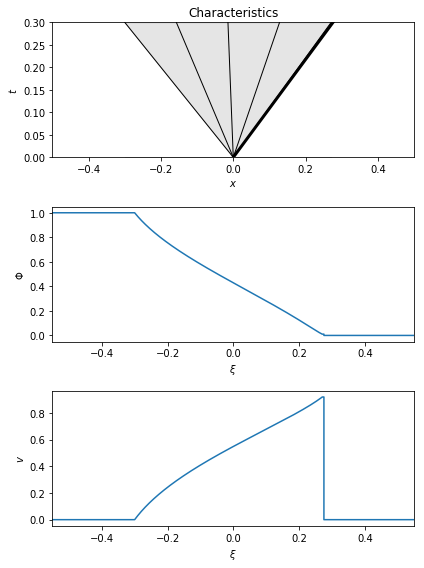

In [10]:
rp_extreme

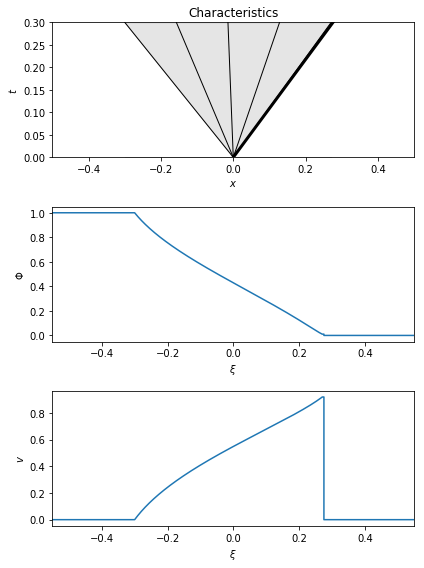

In [11]:
display_png(rp_extreme)